# California Weather Data Exploration

**Dataset**: NOAA GHCN Daily Weather Data (California)  
**Date Range**: 2020 - 2025  
**Source**: NOAA Climate Data Online API

**Objective**: 
- Explore California weather station data
- Analyze temperature and precipitation patterns
- Understand weather conditions during January 2025 fires
- Identify key weather features for fire prediction model


## Why Weather Data Matters for Fire Prediction

Weather is the **most dynamic and critical factor** in wildfire ignition and spread. Understanding weather patterns enables prediction of fire risk days or weeks in advance.

### **1. Temperature Effects** 🌡️
- **High temperatures**: Dry out vegetation (fuel moisture decreases)
- **Heat waves**: Multiple consecutive hot days = critically dry fuels
- **Nighttime cooling**: Low TMIN allows some fuel moisture recovery
- **Temperature extremes**: Records broken in January 2025 (unusual winter fires!)
- **Diurnal range**: Large TMAX-TMIN spread indicates low humidity/dry air

### **2. Precipitation (or Lack Thereof)** 💧
- **Rain**: Increases fuel moisture, suppresses fire ignition and spread
- **Dry spells**: Consecutive days without rain = progressive fuel drying
- **Seasonal drought**: California's dry summer (May-October) = peak fire season
- **Precipitation deficit**: Below-normal rainfall = elevated fire risk for months
- **Snow pack**: Affects spring/summer moisture availability

### **3. Fire Weather Patterns** 🌪️
- **Santa Ana winds**: Hot, dry offshore winds = extreme fire danger (100 mph in Jan 2025!)
- **Low humidity**: Dry air pulls moisture from vegetation
- **Wind direction**: Offshore vs. onshore winds affect fire spread
- **Atmospheric stability**: Stable conditions trap heat, unstable brings thunderstorms

### **4. Synoptic Weather Patterns** 🌍
- **High pressure systems**: Block storms, create hot/dry conditions
- **Drought cycles**: Multi-year patterns (El Niño/La Niña)
- **Climate change**: Earlier springs, hotter summers, delayed fall rains
- **Extreme weather events**: Heat domes, atmospheric rivers

### **5. Predictive Power** 🎯
- **Lead time**: Weather forecasts provide 7-30 day advance warning
- **Real-time updates**: Current conditions + forecast = dynamic risk assessment
- **Trigger conditions**: Identify specific weather thresholds (e.g., temp > 35°C + 0 rain for 14 days)
- **Seasonal context**: Same temperature more dangerous in dry season

### **Key Insight for ML:**
The January 2025 Palisades and Eaton fires were fueled by extreme weather: delayed winter rain, record heat, and 100 mph Santa Ana winds. By learning these weather signatures from historical data, our model can predict when similar dangerous conditions emerge—giving communities time to prepare instead of panic.


In [1]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import warnings
warnings.filterwarnings('ignore')

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

# Set plotting style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (14, 6)

print("✅ Libraries imported successfully!")


✅ Libraries imported successfully!


## 1. Load Weather Data


### Dataset Columns Explained

The NOAA weather dataset contains the following columns:

1. **date**: Date of measurement (format: YYYY-MM-DDTHH:MM:SS)
2. **datatype**: Type of weather measurement (see below for details)
3. **station**: Weather station identifier (format: GHCND:XXXXXXXXX)
4. **attributes**: Quality control metadata (comma-separated flags)
5. **value**: Actual measurement value (units depend on datatype)

#### Attributes Column Breakdown:
The `attributes` column contains quality control information from NOAA:
- Format: `,,quality_flag,measurement_time`
- Example: `,,7,1600` means:
  - Empty fields = no special flags
  - `7` = Data passed 7 quality checks (good quality!)
  - `1600` = Measurement time (4:00 PM in 24-hour format)
- **For ML purposes**: We can ignore this column and use the `value` directly

#### Data Types Available:

| Code | Description | Units | Usage in Fire Prediction |
|------|-------------|-------|--------------------------|
| **TMAX** | Maximum daily temperature | Celsius (°C) | High temps → dry vegetation, higher fire risk |
| **TMIN** | Minimum daily temperature | Celsius (°C) | Temperature range, nighttime conditions |
| **PRCP** | Daily precipitation | Millimeters (mm) | Rain → wet fuels, lower fire risk |

#### Data Source:
- **API**: [NOAA Climate Data Online (CDO)](https://www.ncdc.noaa.gov/cdo-web/)
- **Dataset**: GHCND (Global Historical Climatology Network - Daily)
- **Documentation**: [GHCND Documentation](https://www.ncei.noaa.gov/products/land-based-station/global-historical-climatology-network-daily)
- **API Docs**: [CDO Web Services](https://www.ncdc.noaa.gov/cdo-web/webservices/v2)


In [2]:
# Load combined weather data
weather_file = Path('../data/raw/weather/california_weather_2020_2025_combined.csv')
stations_file = Path('../data/raw/weather/california_weather_stations.csv')

print(f"Loading weather data from: {weather_file}")
print(f"File exists: {weather_file.exists()}")

weather_df = pd.read_csv(weather_file)
print(f"\n✅ Loaded {len(weather_df):,} weather records!")

# Load station metadata
stations_df = pd.read_csv(stations_file)
print(f"✅ Loaded {len(stations_df):,} weather stations!")

print("\nFirst 5 weather records:")
weather_df.head()


Loading weather data from: ../data/raw/weather/california_weather_2020_2025_combined.csv
File exists: True

✅ Loaded 17,000 weather records!
✅ Loaded 1,000 weather stations!

First 5 weather records:


date datatype            station attributes  value
0  2020-01-01T00:00:00     TMAX  GHCND:USC00040136   ,,7,1600   17.2
1  2020-01-01T00:00:00     TMAX  GHCND:USC00040176   ,,7,0800   19.4
2  2020-01-01T00:00:00     TMAX  GHCND:USC00040192   ,,7,1600   22.2
3  2020-01-01T00:00:00     TMAX  GHCND:USC00040212   ,,7,1700   15.0
4  2020-01-01T00:00:00     TMAX  GHCND:USC00040232   ,,7,0800   18.3

## 2. Dataset Overview


In [3]:
# Dataset info
print("=" * 80)
print("WEATHER DATASET SUMMARY")
print("=" * 80)
print(f"\nTotal records: {len(weather_df):,}")
print(f"Columns: {weather_df.shape[1]}")
print(f"\nColumn names: {weather_df.columns.tolist()}")

# Data types
print("\n\nData types and missing values:")
info_df = pd.DataFrame({
    'Column': weather_df.columns,
    'Data Type': weather_df.dtypes,
    'Non-Null': weather_df.count(),
    'Null': weather_df.isnull().sum(),
    'Null %': (weather_df.isnull().sum() / len(weather_df) * 100).round(2)
})
info_df


WEATHER DATASET SUMMARY

Total records: 17,000
Columns: 5

Column names: ['date', 'datatype', 'station', 'attributes', 'value']


Data types and missing values:


Column Data Type  Non-Null  Null  Null %
date              date    object     17000     0     0.0
datatype      datatype    object     17000     0     0.0
station        station    object     17000     0     0.0
attributes  attributes    object     17000     0     0.0
value            value   float64     17000     0     0.0

## 3. Weather Data Types & Coverage


Weather Data Types Available:
TMAX    6000
PRCP    6000
TMIN    5000
Name: datatype, dtype: int64


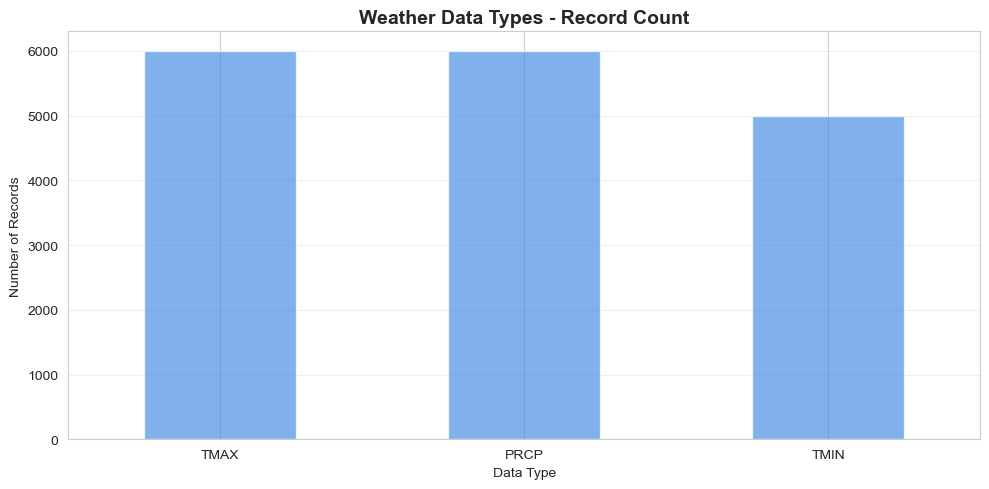



Date Range by Data Type:
TMAX: 2020-01-01 to 2025-01-02
TMIN: 2020-01-01 to 2024-01-02
PRCP: 2020-01-01 to 2025-01-02


In [4]:
# Parse dates
weather_df['date'] = pd.to_datetime(weather_df['date'])

# Weather data types
print("Weather Data Types Available:")
datatype_counts = weather_df['datatype'].value_counts()
print(datatype_counts)

# Plot
plt.figure(figsize=(10, 5))
datatype_counts.plot(kind='bar', color='#4A90E2', alpha=0.7)
plt.title('Weather Data Types - Record Count', fontsize=14, fontweight='bold')
plt.xlabel('Data Type')
plt.ylabel('Number of Records')
plt.xticks(rotation=0)
plt.grid(True, axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

# Date range per data type
print("\n\nDate Range by Data Type:")
for dtype in weather_df['datatype'].unique():
    dtype_data = weather_df[weather_df['datatype'] == dtype]
    print(f"{dtype}: {dtype_data['date'].min().date()} to {dtype_data['date'].max().date()}")


## 4. January 2025 Weather Analysis 🔥


In [5]:
# Filter January 2025 weather (when Palisades & Eaton fires occurred)
jan_2025 = weather_df[(weather_df['date'] >= '2025-01-01') & (weather_df['date'] <= '2025-01-31')]
print(f"January 2025 weather records: {len(jan_2025):,}")

# Summary by data type
print("\nJanuary 2025 Weather Summary:")
for dtype in jan_2025['datatype'].unique():
    jan_dtype = jan_2025[jan_2025['datatype'] == dtype]
    print(f"\n{dtype}:")
    print(f"  Records: {len(jan_dtype)}")
    print(f"  Mean value: {jan_dtype['value'].mean():.2f}")
    print(f"  Min value: {jan_dtype['value'].min():.2f}")
    print(f"  Max value: {jan_dtype['value'].max():.2f}")
    
# Show actual January 2025 data
print("\n\nSample of January 2025 data:")
jan_2025.head(10)


January 2025 weather records: 2,000

January 2025 Weather Summary:

TMAX:
  Records: 1000
  Mean value: 14.41
  Min value: -5.00
  Max value: 29.40

PRCP:
  Records: 1000
  Mean value: 3.04
  Min value: 0.00
  Max value: 71.10


Sample of January 2025 data:


date datatype            station attributes  value
15000 2025-01-01     TMAX  GHCND:USC00040136   ,,7,1600   22.2
15001 2025-01-01     TMAX  GHCND:USC00040192   ,,7,1600   18.3
15002 2025-01-01     TMAX  GHCND:USC00040212   ,,7,1700    8.9
15003 2025-01-01     TMAX  GHCND:USC00040332   ,,7,0800    6.7
15004 2025-01-01     TMAX  GHCND:USC00040444   ,,7,0800   13.3
15005 2025-01-01     TMAX  GHCND:USC00040521   ,,7,0900   15.6
15006 2025-01-01     TMAX  GHCND:USC00040673   ,,7,0800   18.3
15007 2025-01-01     TMAX  GHCND:USC00040741   ,,7,1600   16.1
15008 2025-01-01     TMAX  GHCND:USC00040790   ,,7,1500   16.1
15009 2025-01-01     TMAX  GHCND:USC00040798       ,,7,   22.8

### Potential ML Features from Weather Data

From these basic weather measurements (TMAX, TMIN, PRCP), we can engineer many predictive features:

#### Temperature-Based Features:
1. **Daily Temperature Range** = TMAX - TMIN (large range indicates dry air)
2. **Average Daily Temperature** = (TMAX + TMIN) / 2
3. **7-day Rolling Average Temperature** (recent heat trend)
4. **30-day Rolling Average Temperature** (longer-term pattern)
5. **Temperature Anomaly** = Current temp - Historical average for that date
6. **Days Above Threshold** (e.g., days > 35°C in past week)
7. **Heat Wave Indicator** (consecutive days with high temps)

#### Precipitation-Based Features:
1. **Days Since Last Rain** (critical! dry fuels = fire risk)
2. **7-day Cumulative Precipitation** (recent moisture)
3. **30-day Cumulative Precipitation** (seasonal moisture)
4. **Precipitation Deficit** = Expected rain - Actual rain
5. **Dry Spell Length** (consecutive days with PRCP = 0)
6. **Wet vs. Dry Season Indicator**

#### Combined Features:
1. **Fire Weather Index** = f(temp, humidity, wind, precip) - standard metric
2. **Drying Index** = High temp + No rain
3. **Seasonal Context** (month, season, day of year)

#### Missing (To Add Later):
- ⏳ **Wind Speed** (Santa Ana winds - critical!)
- ⏳ **Wind Direction** (offshore vs. onshore)
- ⏳ **Relative Humidity** (low humidity = high fire risk)
- ⏳ **Wind Gusts** (fire spread accelerator)

These will be added from ERA5 or other sources in later phases.


## 5. Summary for ML Model


In [6]:
print("=" * 80)
print("WEATHER DATA SUMMARY FOR ML MODEL")
print("=" * 80)

print(f"\n📊 Dataset Size:")
print(f"   Total weather records: {len(weather_df):,}")
print(f"   Date range: {weather_df['date'].min().date()} to {weather_df['date'].max().date()}")
print(f"   Years covered: {weather_df['date'].dt.year.nunique()}")

print(f"\n🌡️ Weather Variables:")
for dtype in weather_df['datatype'].unique():
    count = len(weather_df[weather_df['datatype'] == dtype])
    print(f"   {dtype}: {count:,} records")

print(f"\n📍 Geographic Coverage:")
print(f"   Unique weather stations: {weather_df['station'].nunique():,}")
print(f"   Station metadata available: {len(stations_df):,} stations")

print(f"\n🔥 January 2025 Fire Period:")
print(f"   Weather records for Jan 2025: {len(jan_2025):,}")
print(f"   Covers Palisades & Eaton fires: ✅")

print(f"\n✅ Features Ready for ML Model:")
print(f"   ✅ Max Temperature (TMAX)")
print(f"   ✅ Min Temperature (TMIN)")
print(f"   ✅ Precipitation (PRCP)")
print(f"   ⏳ Wind data (limited availability)")

print(f"\n📝 Next Steps:")
print(f"   1. Match weather stations to fire locations")
print(f"   2. Calculate derived features (temp range, dry days, etc.)")
print(f"   3. Aggregate weather data to daily/weekly summaries")

print("=" * 80)


WEATHER DATA SUMMARY FOR ML MODEL

📊 Dataset Size:
   Total weather records: 17,000
   Date range: 2020-01-01 to 2025-01-02
   Years covered: 6

🌡️ Weather Variables:
   TMAX: 6,000 records
   TMIN: 5,000 records
   PRCP: 6,000 records

📍 Geographic Coverage:
   Unique weather stations: 1,556
   Station metadata available: 1,000 stations

🔥 January 2025 Fire Period:
   Weather records for Jan 2025: 2,000
   Covers Palisades & Eaton fires: ✅

✅ Features Ready for ML Model:
   ✅ Max Temperature (TMAX)
   ✅ Min Temperature (TMIN)
   ✅ Precipitation (PRCP)
   ⏳ Wind data (limited availability)

📝 Next Steps:
   1. Match weather stations to fire locations
   2. Calculate derived features (temp range, dry days, etc.)
   3. Aggregate weather data to daily/weekly summaries
